# BiArchetype Analysis

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.datasets import make_checkerboard

n_archetypes = (3, 3)
X, _, _ = make_checkerboard(
    shape=(100, 100),
    n_clusters=n_archetypes,
    noise=0.3,
    random_state=4,
    minval=0,
    maxval=1,
    shuffle=False,
)

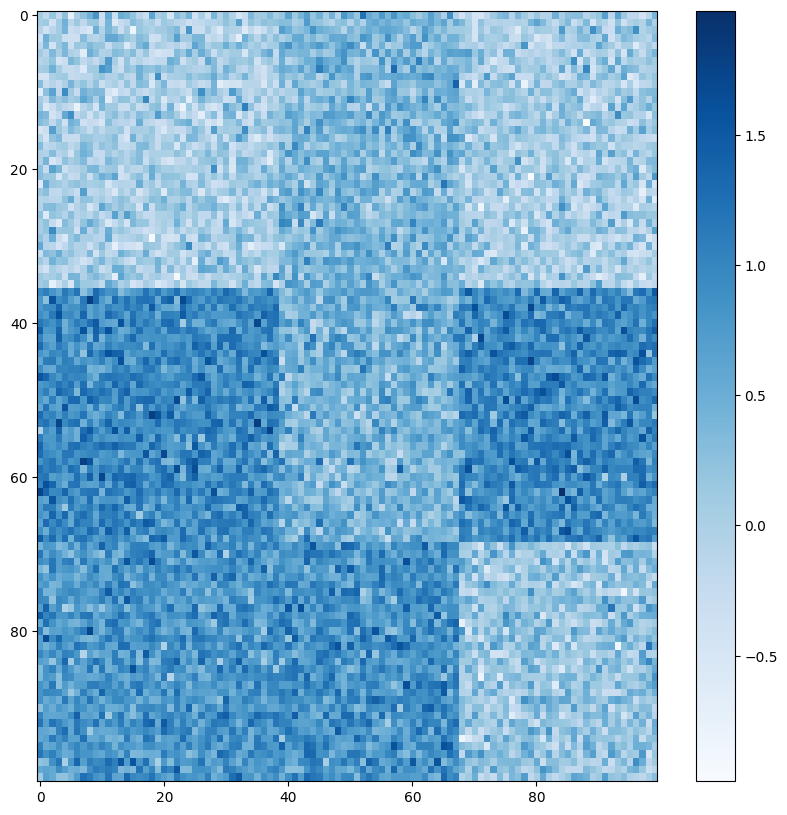

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.imshow(X, cmap="Blues", aspect="auto")
plt.colorbar()
plt.show()

In [4]:
from archetypes.sklearn import BiAA


method_kwargs = {"optimizer": "sgd", "optimizer_kwargs": {"learning_rate": 1e-2}}

# method_kwargs = {}
model = BiAA(
    n_archetypes=n_archetypes,
    max_iter=1_000,
    tol=1e-4,
    random_state=11,
    method="jax",
    method_kwargs=method_kwargs,
    init="uniform",
)
model.fit(X)

BiAA(init=<function uniform at 0x0000027E517CA5F0>, init_kwargs={},
     max_iter=1000, method='jax',
     method_kwargs={'optimizer': 'sgd',
                    'optimizer_kwargs': {'learning_rate': 0.01}},
     n_archetypes=(3, 3), random_state=RandomState(MT19937) at 0x27E56B37340)

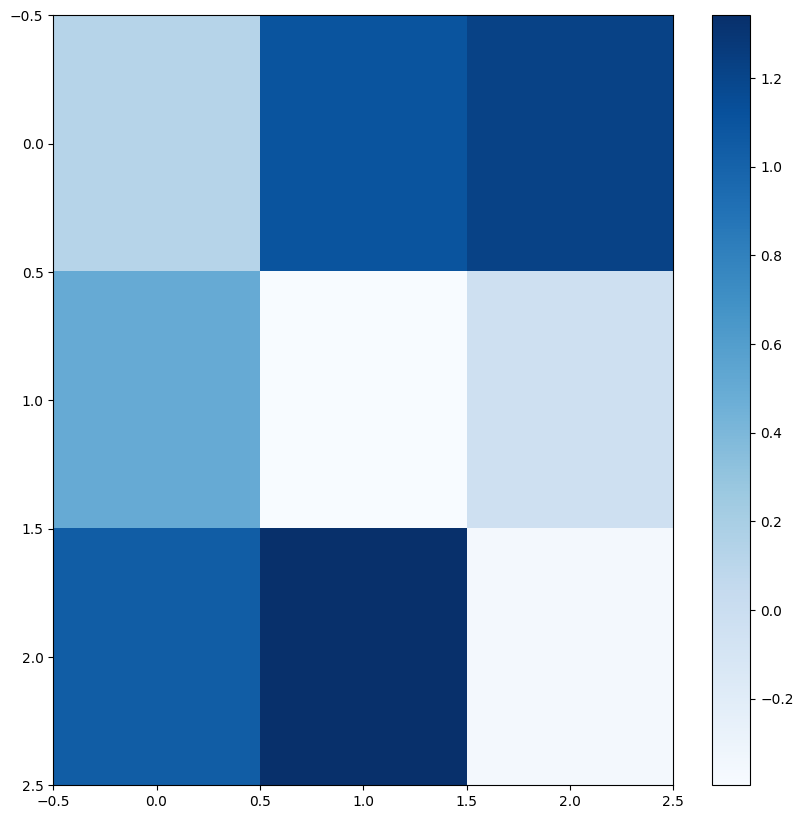

In [5]:
plt.figure(figsize=(10, 10))
plt.imshow(model.archetypes_, cmap="Blues", aspect="auto")
plt.colorbar()
plt.show()

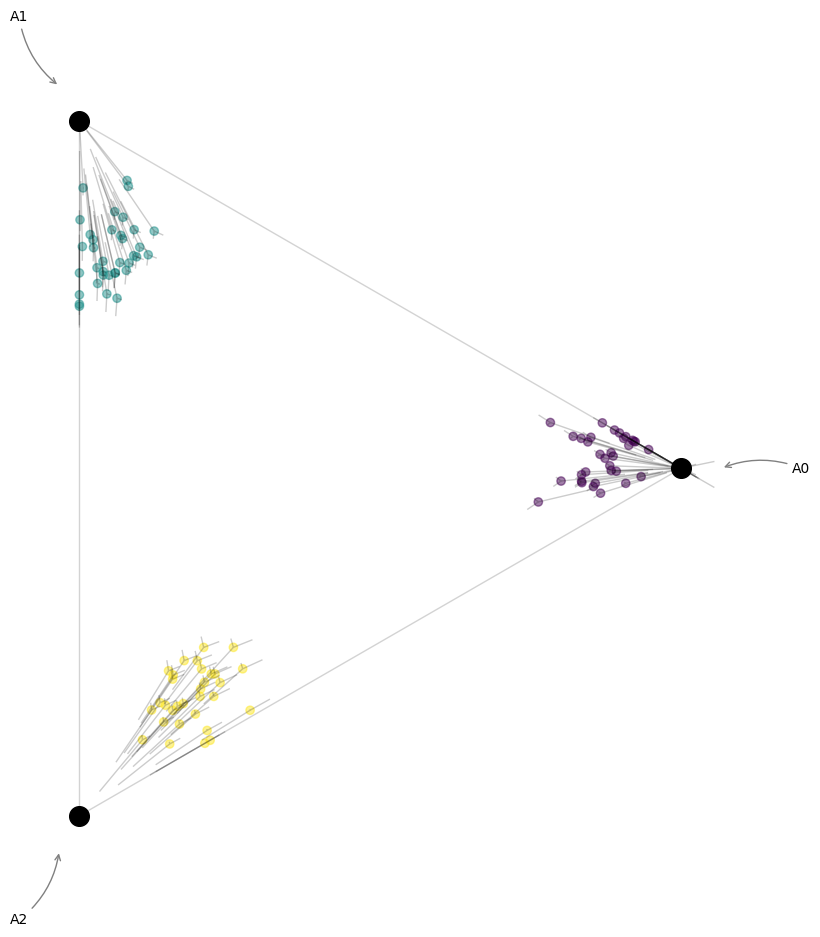

In [6]:
import matplotlib.pyplot as plt
from archetypes.visualization import simplex

plt.figure(figsize=(10, 10))
simplex(
    model.similarity_degree_[0],
    c=model.labels_[0],
    alpha=0.5,
    show_circle=False,
    show_direction=True,
)

plt.show()